 #E-Commerce Sales Performance Analysis using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


df = pd.read_csv(r"D:\anchal project 6\archive (2)\SuperStore_Orders.csv", encoding='latin1')


In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.shape

(51290, 21)

In [5]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [6]:
df.info

<bound method DataFrame.info of               order_id  order_date   ship_date       ship_mode  \
0         AG-2011-2040  01-01-2011  06-01-2011  Standard Class   
1        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
2         HU-2011-1220  01-01-2011  05-01-2011    Second Class   
3      IT-2011-3647632  01-01-2011  05-01-2011    Second Class   
4        IN-2011-47883  01-01-2011  08-01-2011  Standard Class   
...                ...         ...         ...             ...   
51285   CA-2014-115427  31-12-2014  04-01-2015  Standard Class   
51286     MO-2014-2560  31-12-2014  05-01-2015  Standard Class   
51287   MX-2014-110527  31-12-2014  02-01-2015    Second Class   
51288   MX-2014-114783  31-12-2014  06-01-2015  Standard Class   
51289   CA-2014-156720  31-12-2014  04-01-2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           J

In [7]:
# Missing Value Analysis
df.isnull().sum()



order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df.dtypes




order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d-%m-%Y', errors='coerce')


In [10]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


In [11]:
df.dtypes


order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [12]:
df.describe(include='object')

,order_id,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,order_priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,795,3,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,108,26518,2001,9994,11002,11117,35,31273,6152,227,29433


In [13]:
yearly_summary = df.groupby('year')[['sales', 'profit']].sum().reset_index()


In [14]:
yearly_summary

,year,sales,profit
0,2011,1378151.0,248940.81154
1,2012,1681499.0,307415.27910
2,2013,2107021.0,408512.76018
3,2014,2668457.0,504165.97046


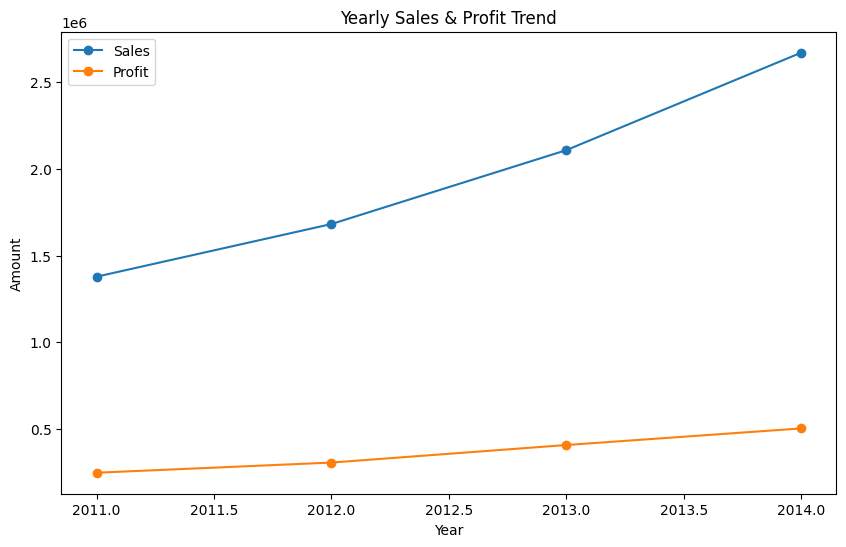

In [15]:


# Step 1: Set the figure size (correct function is 'plt.figure', not 'plt.figuresize')
plt.figure(figsize=(10,6))

# Step 2: Plot sales and profit separately with labels
plt.plot(yearly_summary['year'], yearly_summary['sales'], marker='o', label='Sales')
plt.plot(yearly_summary['year'], yearly_summary['profit'], marker='o', label='Profit')

# Step 3: Add title and labels
plt.title('Yearly Sales & Profit Trend')
plt.xlabel('Year')
plt.ylabel('Amount')

# Step 4: Show legend and display the chart
plt.legend()
plt.show()


In [16]:
region_summary = df.groupby('region')[['sales', 'profit']].sum().reset_index()

In [17]:
region_summary

,region,sales,profit
0,Africa,538115.0,88871.63100
1,Canada,50314.0,17817.39000
2,Caribbean,251441.0,34571.32104
3,Central,1806638.0,311403.98164
4,Central Asia,389506.0,132480.18700
5,EMEA,575562.0,43897.97100
6,East,366492.0,91522.78000
7,North,790546.0,194597.95252
8,North Asia,453686.0,165578.42100
9,Oceania,625382.0,121666.64200


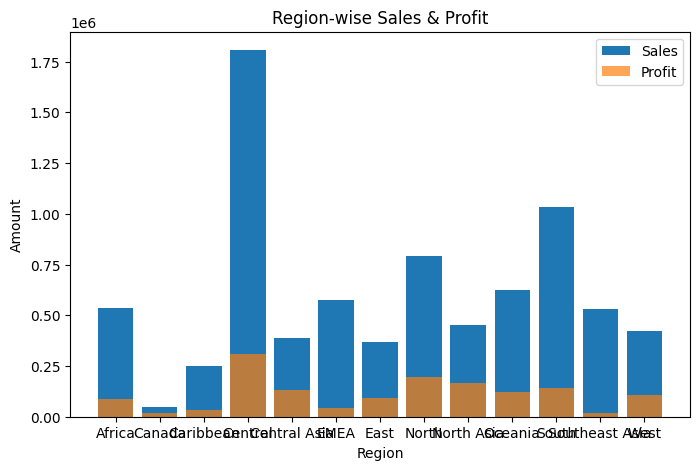

In [18]:
plt.figure(figsize=(8,5))
plt.bar(region_summary['region'], region_summary['sales'], label='Sales')
plt.bar(region_summary['region'], region_summary['profit'], label='Profit', alpha=0.7)
plt.title('Region-wise Sales & Profit')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [19]:
segment_summary = df.groupby('segment')[['sales', 'profit']].sum().reset_index()

In [20]:
segment_summary

,segment,sales,profit
0,Consumer,4058118.0,749239.78206
1,Corporate,2369261.0,442785.85866
2,Home Office,1407749.0,277009.18056


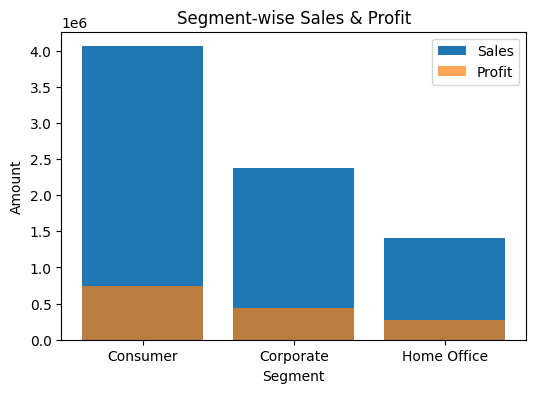

In [21]:
plt.figure(figsize=(6,4))
plt.bar(segment_summary['segment'], segment_summary['sales'], label='Sales')
plt.bar(segment_summary['segment'], segment_summary['profit'], label='Profit', alpha=0.7)
plt.title('Segment-wise Sales & Profit')
plt.xlabel('Segment')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [22]:
category_summary = df.groupby('category')[['sales', 'profit']].sum().reset_index()

In [23]:
category_summary

,category,sales,profit
0,Furniture,2406605.0,286782.25380
1,Office Supplies,2790258.0,518473.83430
2,Technology,2638265.0,663778.73318


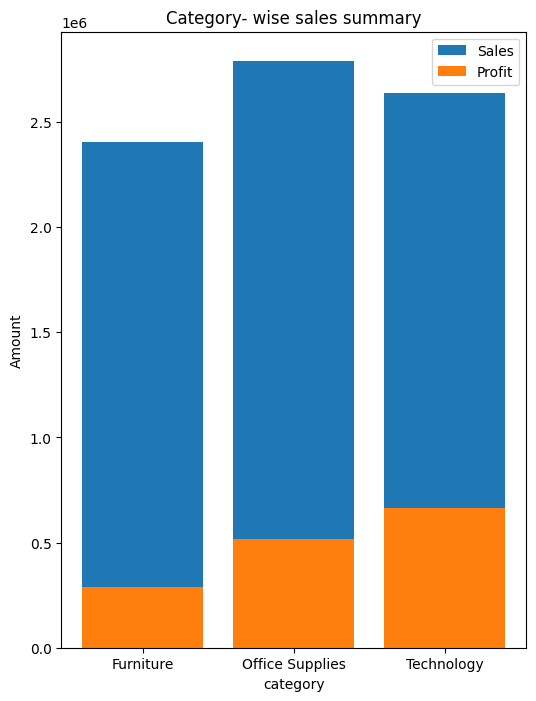

In [24]:
plt.figure(figsize=(6,8))
plt.bar(category_summary['category'],category_summary['sales'],label = 'Sales')
plt.bar(category_summary['category'],category_summary['profit'],label = 'Profit')
plt.title('Category- wise sales summary')
plt.xlabel('category')
plt.ylabel('Amount')
plt.legend()
plt.show()          

In [25]:
df['discount'].corr(df['profit'])

np.float64(-0.3163749562484039)

#There is a moderate negative correlation (-0.32) between discount and profit, which means as discount increases, profit tends to decrease — but not extremely strongly. Some products might still remain profitable even after small discounts.

In [43]:
top_products = df.groupby('product_name')[['sales','profit']].sum().sort_values(by='profit', ascending=False).head(10)

In [44]:
top_products

,sales,profit
product_name,,
Canon imageCLASS 2200 Advanced Copier,0.0,25199.9280
"Cisco Smart Phone, Full Size",7220.0,17238.5206
"Motorola Smart Phone, Full Size",9157.0,17027.1130
"Hoover Stove, Red",3638.0,11807.9690
"Sauder Classic Bookcase, Traditional",8242.0,10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10658.0,10427.3260
"Nokia Smart Phone, Full Size",9237.0,9938.1955
"Cisco Smart Phone, with Caller ID",7325.0,9786.6408
"Nokia Smart Phone, with Caller ID",2301.0,9465.3257


<Figure size 1000x600 with 0 Axes>

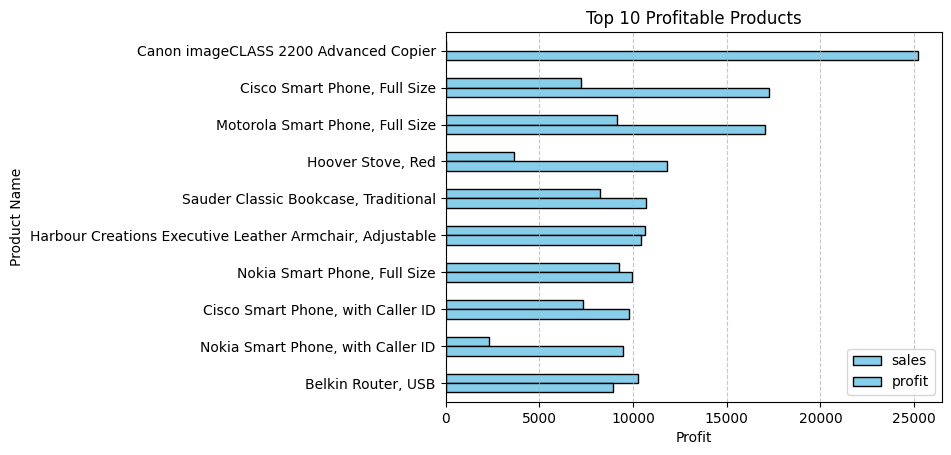

In [45]:

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top 10 Profitable Products')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [34]:
# Step 1: Loss-making products ka data banao
loss_products = df.groupby('product_name')['profit'].sum().sort_values(ascending=True).head(10)


In [35]:
loss_products 

product_name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Name: profit, dtype: float64

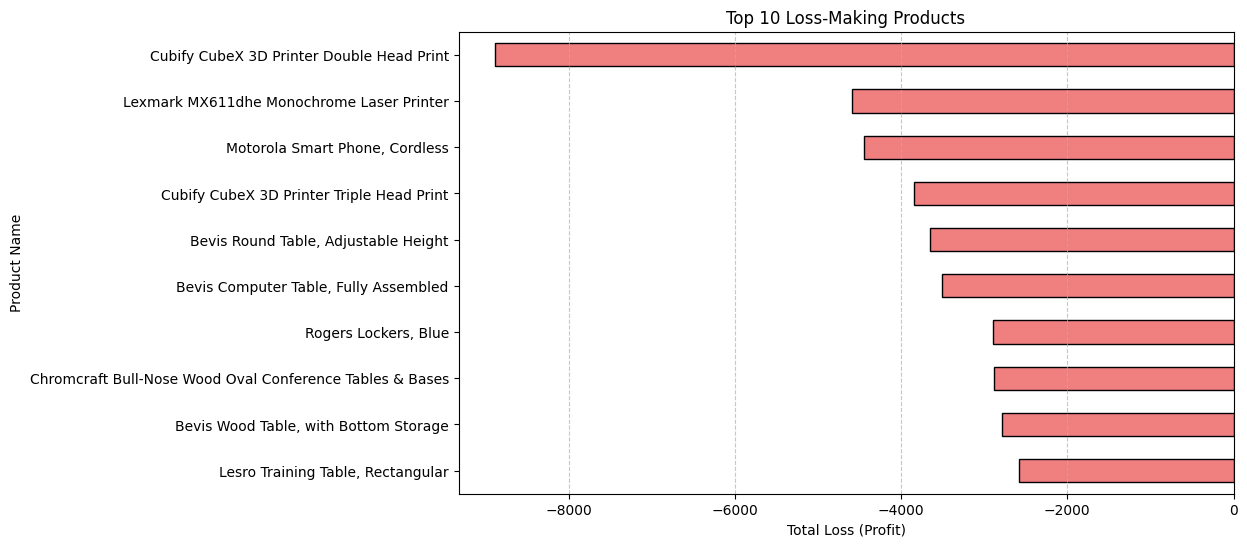

In [36]:



plt.figure(figsize=(10, 6))
loss_products.plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 10 Loss-Making Products')
plt.xlabel('Total Loss (Profit)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # sabse zyada loss upar dikhane ke liye
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [37]:
category_summary = df.groupby(['category', 'sub_category'])['sales'].sum().reset_index()


In [38]:
category_summary 

,category,sub_category,sales
0,Furniture,Bookcases,811505.0
1,Furniture,Chairs,927982.0
2,Furniture,Furnishings,377432.0
3,Furniture,Tables,289686.0
4,Office Supplies,Appliances,377590.0
5,Office Supplies,Art,371050.0
6,Office Supplies,Binders,346130.0
7,Office Supplies,Envelopes,170926.0
8,Office Supplies,Fasteners,83254.0
9,Office Supplies,Labels,73433.0


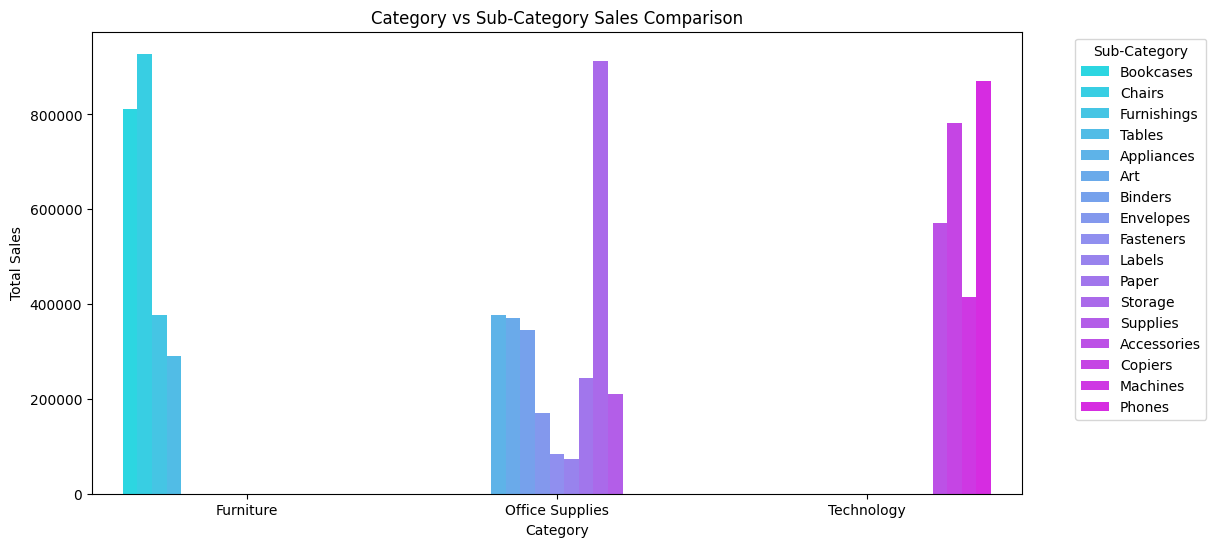

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=category_summary,
    x='category',
    y='sales',
    hue='sub_category',
    palette='cool'
)
plt.title('Category vs Sub-Category Sales Comparison')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [47]:
ship_summary = df.groupby('ship_mode')[['sales', 'profit', 'shipping_cost']].sum().sort_values(by='profit', ascending=False)
ship_summary


,sales,profit,shipping_cost
ship_mode,,,
Standard Class,4719603.0,890596.02120,614630.76
Second Class,1583086.0,294161.05708,314112.62
First Class,1133651.0,208104.67520,308103.25
Same Day,398788.0,76173.06780,115974.06


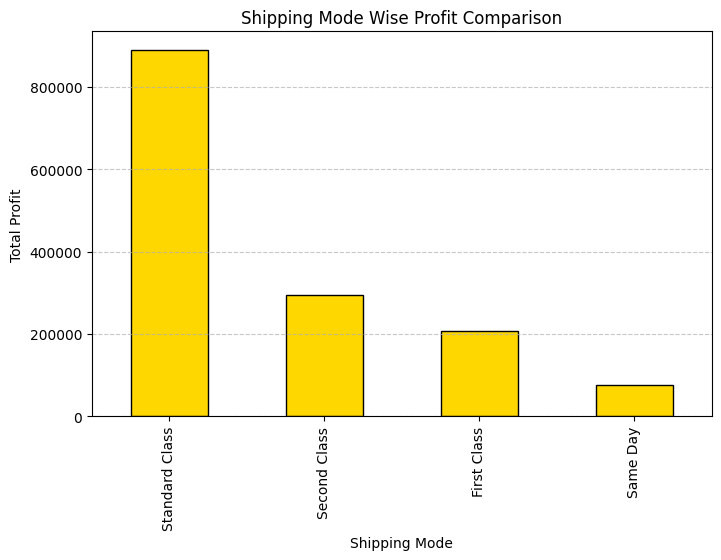

In [48]:
plt.figure(figsize=(8,5))
ship_summary['profit'].plot(kind='bar', color='gold', edgecolor='black')
plt.title('Shipping Mode Wise Profit Comparison')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
priority_summary = df.groupby('order_priority')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
priority_summary


,sales,profit
order_priority,,
Medium,4491457.0,864203.76262
High,2365250.0,420373.51340
Critical,598854.0,125801.69428
Low,379567.0,58655.85098


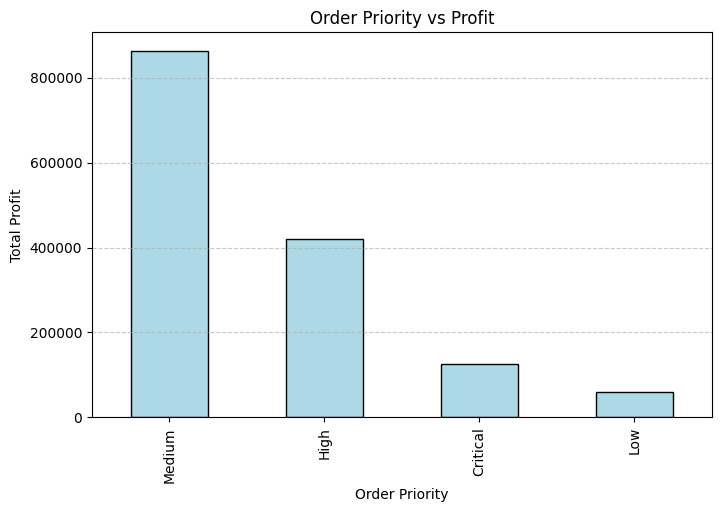

In [50]:
plt.figure(figsize=(8,5))
priority_summary['profit'].plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Order Priority vs Profit')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [51]:
market_summary = df.groupby('market')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)
market_summary


,sales,profit
market,,
APAC,2000746.0,437577.57900
EU,1803099.0,372829.74150
LATAM,1563126.0,221643.48708
US,1304166.0,286397.02170
EMEA,575562.0,43897.97100
Africa,538115.0,88871.63100
Canada,50314.0,17817.39000


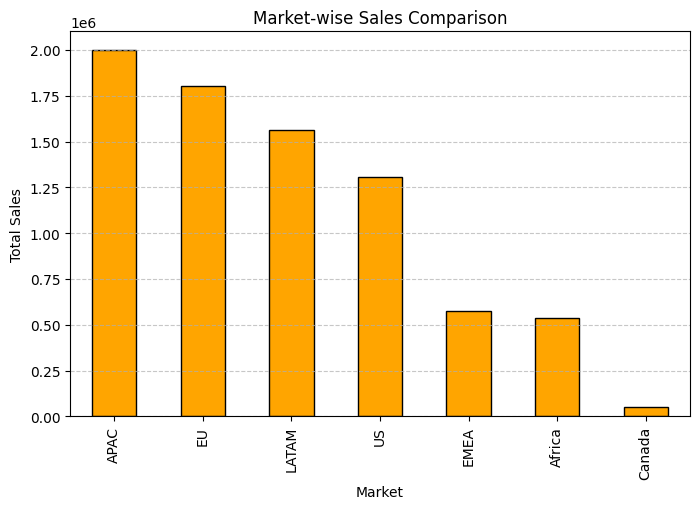

In [52]:
plt.figure(figsize=(8,5))
market_summary['sales'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Market-wise Sales Comparison')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


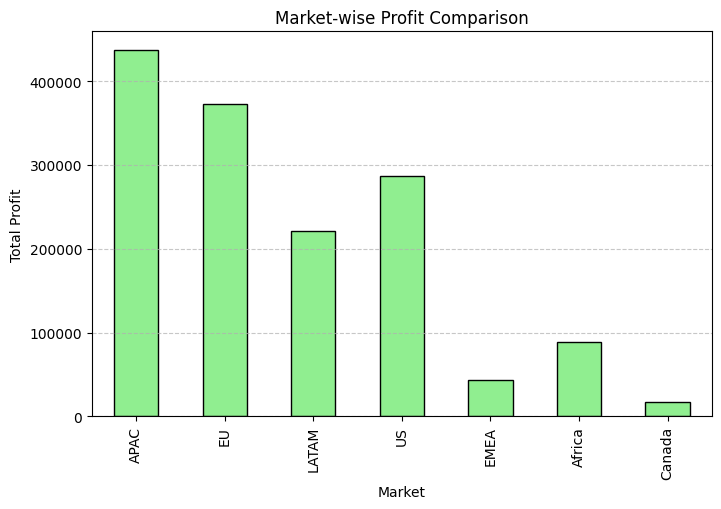

In [53]:
plt.figure(figsize=(8,5))
market_summary['profit'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Market-wise Profit Comparison')
plt.xlabel('Market')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [54]:
df[['shipping_cost', 'profit']].corr()


,shipping_cost,profit
shipping_cost,1.000000,0.357033
profit,0.357033,1.000000


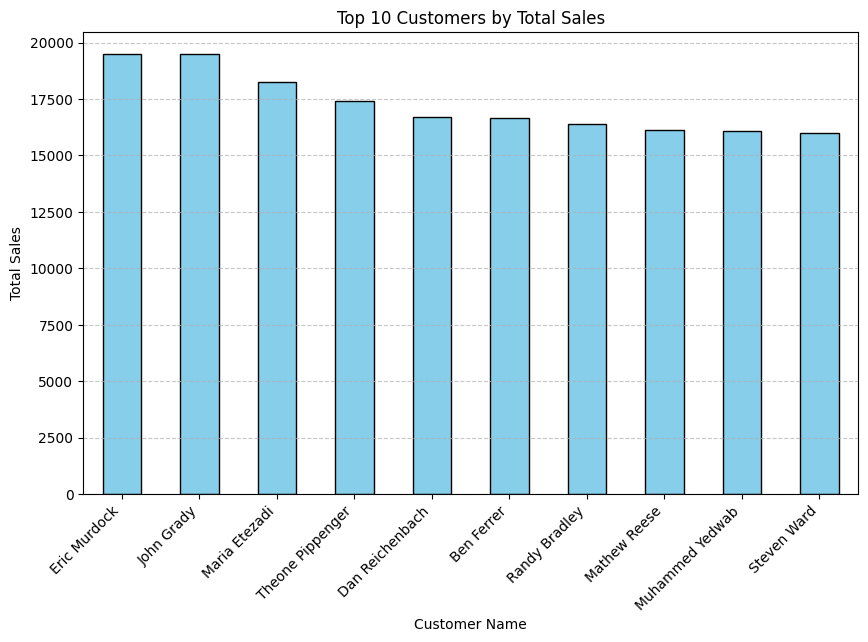

In [55]:
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [56]:
category_profit = df.groupby(['category', 'sub_category'])['profit'].sum().sort_values(ascending=False)
category_profit

category         sub_category
Technology       Copiers         258567.54818
                 Phones          216717.00580
Furniture        Bookcases       161924.41950
                 Chairs          141973.79750
Office Supplies  Appliances      141680.58940
Technology       Accessories     129626.30620
Office Supplies  Storage         108461.48980
                 Binders          72449.84600
                 Paper            59207.68270
Technology       Machines         58867.87300
Office Supplies  Art              57953.91090
Furniture        Furnishings      46967.42550
Office Supplies  Envelopes        29601.11630
                 Supplies         22583.26310
                 Labels           15010.51200
                 Fasteners        11525.42410
Furniture        Tables          -64083.38870
Name: profit, dtype: float64

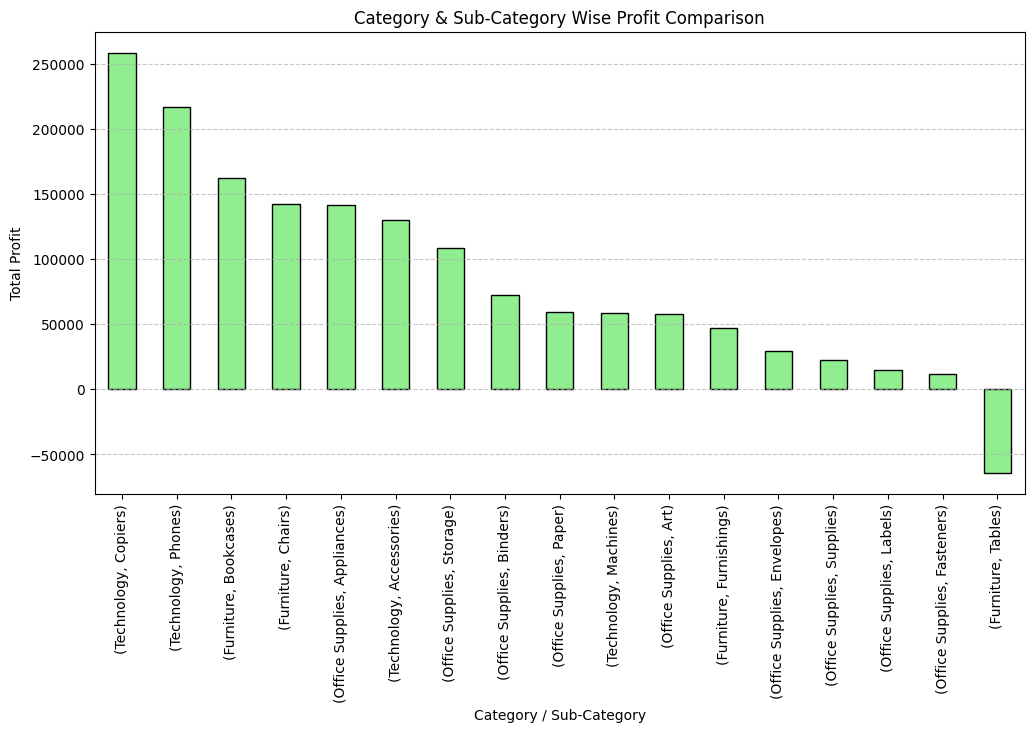

In [57]:


plt.figure(figsize=(12,6))
category_profit.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Category & Sub-Category Wise Profit Comparison')
plt.xlabel('Category / Sub-Category')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()



# 📊 E-Commerce Sales Analysis Dashboard

### 🎯 Objective:
To analyze sales, profit, and performance trends across regions, categories, and customers to support business decisions.

---

### 🔍 Key Insights Summary:
- **Highest Sales Year:** 2014  
- **Most Profitable Category:** (write the category name from your chart)  
- **Region with Maximum Profit:** (from region_summary)  
- **Top Customer:** (from top customers chart)  
- **Top Profitable Product:** (from your profitable products chart)  
- **Most Loss-Making Product:** (from your loss products chart)  
- **Shipping Cost & Profit Correlation:** Weak positive relation (≈0.35)

---

### 📈 Dashboard Components:
1. Yearly Sales & Profit Trend  
2. Region-wise Profit  
3. Category & Sub-category Performance  
4. Top 10 Profitable Products  
5. Top 10 Loss-Making Products  
6. Top 10 Customers by Sales  

---

✨ **Conclusion:**  
The company should focus on:
- Expanding in high-profit regions  
- Improving pricing for loss-making products  
- Rewarding top customers and improving retention strategies  
- Monitoring shipping cost efficiency
